# Introduction

In the ever-evolving landscape of economic and financial analysis, accurate forecasting is crucial for informed decision-making. Among the various methodologies employed in time series analysis, the **ARIMA (AutoRegressive Integrated Moving Average)**  model stands out as a robust and versatile tool for predicting future trends based on historical data. This paper presents a comprehensive analysis and application of the ARIMA model, focusing on its implementation to forecast macroeconomic indicators, specifically the Unemployment Rate, using data obtained from the Federal Reserve Economic Data (FRED) system.

## The purpose of this project is twofold: 
to educate readers on the fundamentals and practical applications of ARIMA modeling in economic forecasting, and to provide insights into the process of developing, tuning, and evaluating such models using real-world data. By leveraging Python's powerful data analysis libraries, we demonstrate how to preprocess time series data, identify the appropriate ARIMA parameters, and generate accurate monthly forecasts. The resulting model not only serves as a predictive tool but also exemplifies the importance of data-driven decision-making in economic policy and business strategy.

Throughout this paper, we guide readers through each step of the ARIMA modeling process, from data acquisition and preprocessing to model fitting and evaluation. We also explore the challenges and considerations inherent in time series forecasting, such as handling missing data, dealing with seasonality, and selecting the best model parameters. By the end of this paper, readers will have a solid understanding of how ARIMA models work, how to apply them to their own data, and how to interpret the results to make informed predictions about future economic trends.

This project not only underscores the power of ARIMA modeling in economic forecasting but also serves as a valuable resource for analysts, economists, and data scientists seeking to enhance their predictive capabilities.

# Import Libraries
The initial segment of our Python script sets the foundation for the entire ARIMA modeling process by importing the necessary libraries and modules. Each import serves a specific purpose in facilitating the various stages of data analysis, modeling, and visualization.
### import **pandas** as pd:
- Purpose: Pandas is a powerful library for data manipulation and analysis. In this project, it is primarily used to handle and process time series data. It allows for efficient data manipulation, including data cleaning, transformation, and aggregation.
- Usage: We use Pandas to load the time series data from the Federal Reserve Economic Data (FRED), manage it in a DataFrame structure, and perform operations such as resampling the data to a monthly frequency.
### import **numpy** as np:
- Purpose: NumPy is the fundamental package for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
- Usage: In our project, NumPy is used for performing numerical calculations, such as generating arrays of predictions and performing mathematical operations required for model evaluation and data manipulation.
### import **matplotlib.pyplot** as plt:
- Purpose: Matplotlib is a widely used plotting library in Python that allows for the creation of static, interactive, and animated visualizations.
- Usage: We use Matplotlib to create various plots that visualize the time series data, the performance of the ARIMA model, and the forecasted values. This helps in understanding the trends in the data and the effectiveness of the model.
### from statsmodels.tsa.arima.model import **ARIMA**:
- Purpose: Statsmodels is a Python library that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and data exploration.
- Usage: The ARIMA class from Statsmodels is the core of our project. It is used to create and fit the ARIMA model to our time series data, allowing us to make predictions about future values based on past observations.
### from sklearn.metrics import **mean_squared_error**, **mean_absolute_error**:
- Purpose: Scikit-learn is a machine learning library that provides simple and efficient tools for data mining and data analysis.
- Usage: We use the mean_squared_error and mean_absolute_error functions from Scikit-learn to evaluate the performance of our ARIMA model. These metrics help us quantify the accuracy of the model’s predictions by comparing them to the actual observed values.
### from fredapi import **Fred**:
- Purpose: FredAPI is a Python API wrapper that allows for easy access to economic data from the Federal Reserve Economic Data (FRED) database.
- Usage: We use FredAPI to download the time series data for the Unemployment Rate (or any other macroeconomic indicator of interest) directly from FRED. This data is then used to train and test our ARIMA model.
### import warnings:
- Purpose: The warnings module is part of the Python Standard Library and is used to manage warnings that are encountered during code execution.
- Usage: In this project, we use warnings.filterwarnings('ignore') to suppress unnecessary warnings that could clutter the output, especially those related to deprecated features or library issues that do not affect the execution of our script.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from fredapi import Fred
import warnings

warnings.filterwarnings('ignore')

# Set up your API Key
If you do not have a Fred account yet, go to https://fred.stlouisfed.org/ and create one to get free access to economic indicators.


By setting up the FRED API key and initializing the Fred object, this section of the script establishes a direct link to the Federal Reserve's vast economic data resources. This connection is vital for obtaining real-time and historical economic data, which forms the foundation of the time series analysis and forecasting conducted in the project. The flexibility provided by the FRED API allows for easy access to a wide range of macroeconomic indicators, making it an invaluable tool for economic modeling and analysis.

In [3]:
# Setting up the FRED API key (replace with your own key)
api_key = '060213f8f9bc0f09d86c251b43f3e1dc'
fred = Fred(api_key=api_key)

## Make your First API call
This part is crucial for extracting the necessary time series data from the FRED database and organizing it into a Pandas DataFrame. The data retrieval process is streamlined by specifying a series ID, and the subsequent conversion to a DataFrame allows for more intuitive data manipulation and analysis. By carefully preparing the data in this manner, you lay the groundwork for accurate and meaningful time series analysis, making it easier to apply models like ARIMA and interpret the results.

In [4]:
# Fetching the data
series_id = 'UNRATE'
data = fred.get_series(series_id)

# Converting to DataFrame
df = pd.DataFrame(data, columns=['Value'])
df.index.name = 'Date'

## Prepare the Data
Time series data, which may originally be at a higher frequency (such as daily or weekly), is resampled to a monthly frequency. This process helps in smoothing the data and making it more suitable for monthly trend analysis and forecasting. Additionally, the resampled data is visualized to provide a clear understanding of the trends over time.

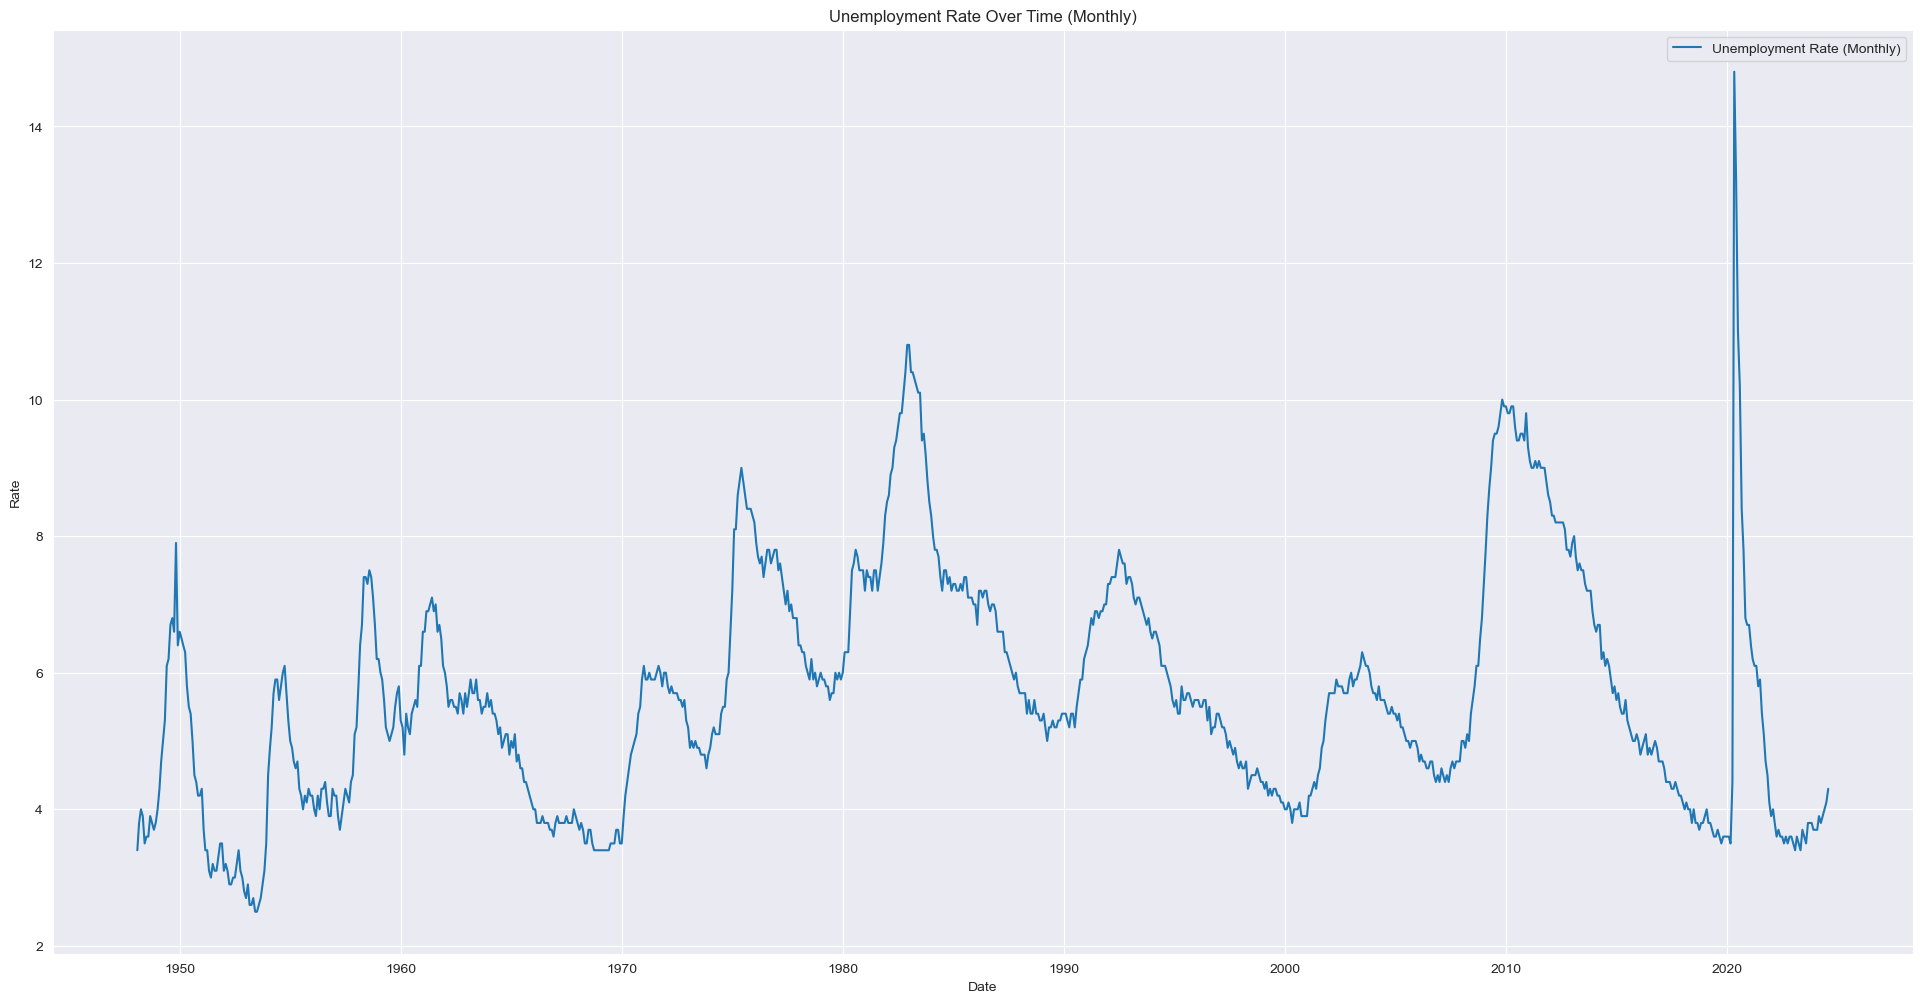

In [5]:
# Resampling the data to monthly frequency
df_monthly = df.resample('M').mean()

# Plotting the resampled data
plt.figure(figsize=(24, 12))
plt.plot(df_monthly, label='Unemployment Rate (Monthly)')
plt.title('Unemployment Rate Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

## Handling Missing Values and Splitting the Data
This sectio addresses two crucial steps in the time series analysis workflow: handling missing values and splitting the data into training and testing sets. These steps are essential for preparing the data for modeling and ensuring that the ARIMA model is trained and evaluated effectively.

In [7]:
# Handling missing values (if any)
df.dropna(inplace=True)

# Splitting the monthly data into training and testing sets
train_size = int(len(df_monthly) * 0.8)
train, test = df_monthly[:train_size], df_monthly[train_size:]

## Model Evaluation Function and Initial ARIMA Model
This section defines a function to evaluate the performance of the ARIMA model using specified parameters, and then applies this function to an initial ARIMA model with given orders (p, d, q).

In [8]:
# Function to evaluate the model
def evaluate_arima_model(train, test, order):
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    return mse, mae, predictions

# Initial ARIMA model
order = (1, 1, 1)
mse, mae, predictions = evaluate_arima_model(train.values, test.values, order)

print(f'Model: ARIMA{order} \nMSE: {mse} \nMAE: {mae}')

Model: ARIMA(1, 1, 1) 
MSE: 0.7977623024914131 
MAE: 0.24770720746096014


## Visualizing Results

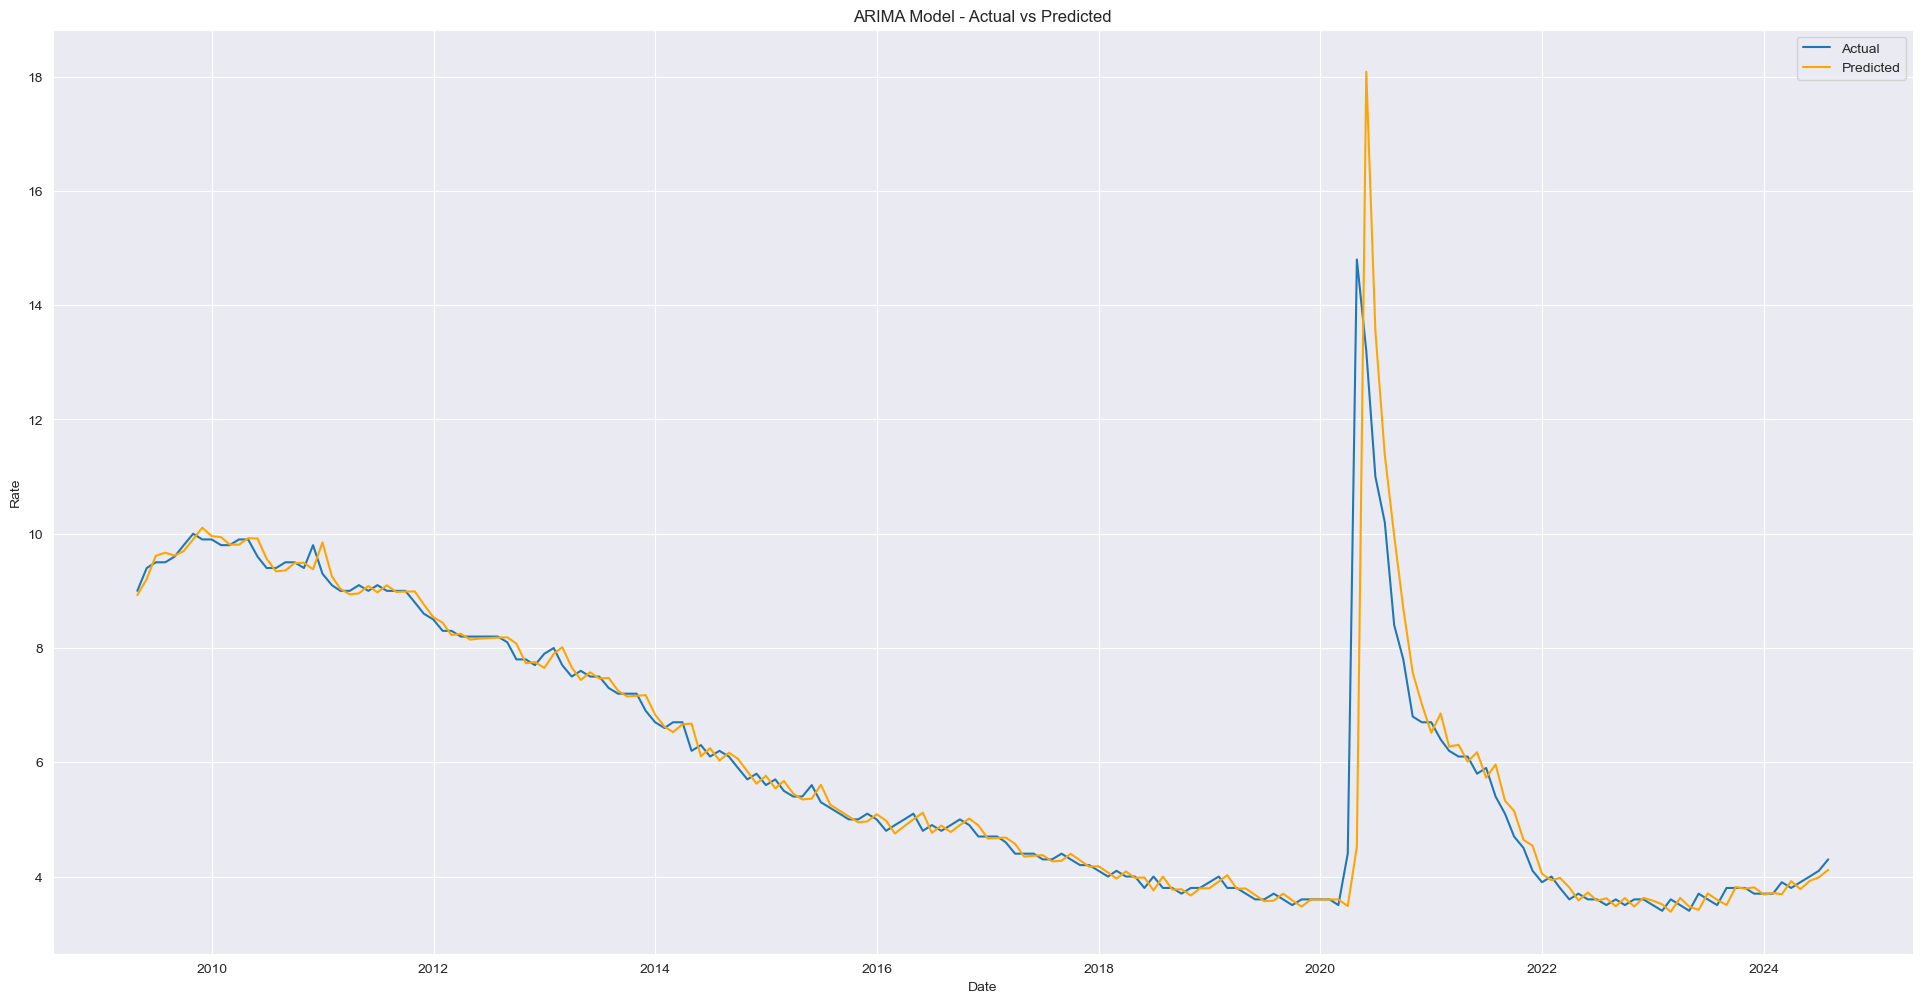

In [9]:
# Plotting actual vs predicted values
plt.figure(figsize=(24, 12))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, color='orange', label='Predicted')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

## Hyperparameter Tuning (Grid Search)
This section is dedicated to optimizing the ARIMA model by finding the best combination of parameters (p, d, q) through a process known as Grid Search. Hyperparameter tuning is crucial for improving the accuracy of the model by systematically evaluating various configurations and selecting the one that yields the best performance

In [10]:
# Hyperparameter Tuning (Grid Search)
import itertools

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_score, best_cfg = float('inf'), None
for param in pdq:
    try:
        mse, mae, _ = evaluate_arima_model(train.values, test.values, param)
        if mse < best_score:
            best_score, best_cfg = mse, param
        print(f'ARIMA{param} MSE={mse}')
    except:
        continue

print(f'Best ARIMA{best_cfg} MSE={best_score}')

ARIMA(0, 0, 0) MSE=5.613923220627837
ARIMA(0, 0, 1) MSE=2.171722977425112
ARIMA(0, 1, 0) MSE=0.6857608695652175
ARIMA(0, 1, 1) MSE=0.7532208411862698
ARIMA(0, 1, 2) MSE=0.8717028669753889
ARIMA(0, 2, 0) MSE=1.3540217389074714
ARIMA(0, 2, 1) MSE=0.8144582972398698
ARIMA(0, 2, 2) MSE=0.9216771051234075
ARIMA(1, 0, 0) MSE=0.6752593229102689
ARIMA(1, 0, 1) MSE=0.7377709918317319
ARIMA(1, 0, 2) MSE=0.8504671972918996
ARIMA(1, 1, 0) MSE=0.8132407134681212
ARIMA(1, 1, 1) MSE=0.7977623024914131
ARIMA(1, 1, 2) MSE=0.894053350099418
ARIMA(1, 2, 0) MSE=1.6535283034430377
ARIMA(1, 2, 1) MSE=0.9374903238011136
ARIMA(1, 2, 2) MSE=0.9337994739862899
ARIMA(2, 0, 0) MSE=0.7985094413464221
ARIMA(2, 0, 1) MSE=0.7823385732637685
ARIMA(2, 0, 2) MSE=0.8521549828441743
ARIMA(2, 1, 0) MSE=0.9130406443092964
ARIMA(2, 1, 1) MSE=0.9026984618800347
ARIMA(2, 1, 2) MSE=0.8226963918019624
ARIMA(2, 2, 0) MSE=1.6312102125564094
ARIMA(2, 2, 1) MSE=1.0011306800144195
ARIMA(2, 2, 2) MSE=1.0071591498460724
Best ARIMA(1, 0

## Final Model with Best Parameters and Forecasting
This final section utilizes the best parameters found during the hyperparameter tuning phase to fit the ARIMA model to the entire dataset. Then generates a forecast for future values and visualizes both the historical data and the forecasted values.

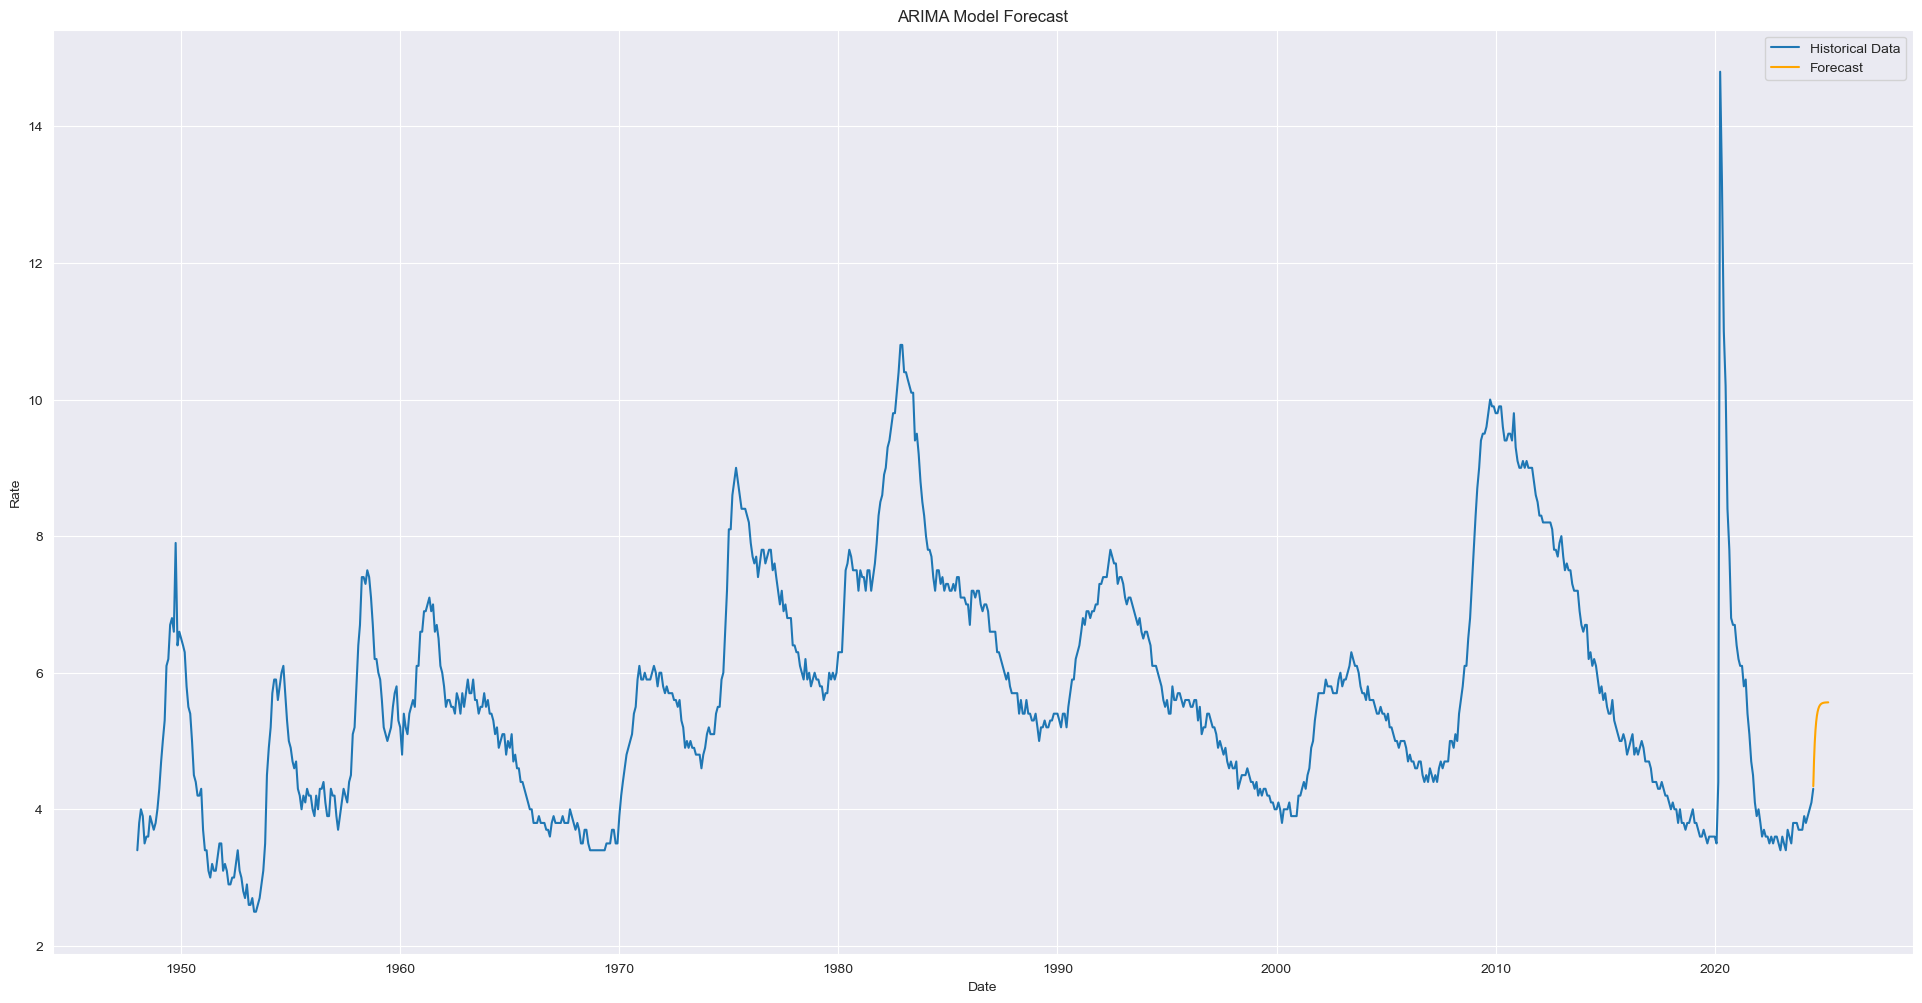

In [13]:
# Final Model with best parameters
model = ARIMA(df, order=best_cfg)
model_fit = model.fit()

# Forecasting
forecast_steps = 250
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, inclusive='right')


# Plotting forecast
plt.figure(figsize=(24, 12))
plt.plot(df, label='Historical Data')
plt.plot(forecast_index, forecast, color='orange', label='Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

## How accurate is the ARIMA model to forecast Unemployment?
This section calculates key metrics that quantify the accuracy and reliability of the ARIMA model's forecasts. By evaluating these metrics, you can assess how well the model is performing and whether it provides reliable forecasts. This final step is crucial for validating the effectiveness of the model and making any necessary adjustments to improve its predictive power.

In [19]:
# Assuming that `test` contains the actual values and `predictions` contains the forecasted values from the test set
# If you have actual future data, replace `test` with those actual values.

# Convert test and predictions to Pandas Series if they are not already
if isinstance(test, list):
    test_series = pd.Series(test)
elif isinstance(test, pd.DataFrame):
    test_series = test.squeeze()  # Convert single-column DataFrame to Series
else:
    test_series = test  # Assume it's already a Series

if isinstance(predictions, list):
    predictions_series = pd.Series(predictions)
else:
    predictions_series = predictions  # Assume it's already a Series or DataFrame

# Ensure both series have the same length and are aligned
min_len = min(len(test_series), len(predictions_series))
test_series = test_series[:min_len]
predictions_series = predictions_series[:min_len]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_series, predictions_series)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_series, predictions_series)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test_series - predictions_series) / test_series)) * 100

# Calculate R-squared (R²)
r2 = r2_score(test_series, predictions_series)

# Print the evaluation metrics
print(f'Model Accuracy and Reliability Metrics:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'R-squared (R²): {r2}')

Model Accuracy and Reliability Metrics:
Mean Squared Error (MSE): 0.7977623024914131
Mean Absolute Error (MAE): 0.24770720746096014
Mean Absolute Percentage Error (MAPE): nan%
R-squared (R²): 0.8540252599148026


## Interpretation of Model Accuracy and Reliability Metrics
**Mean Squared Error (MSE): 0.7977623024914131**

- Interpretation: 

MSE measures the average squared difference between the actual values and the predicted values. An MSE of approximately 0.798 indicates that, on average, the square of the errors (the differences between actual and predicted values) is about 0.798. While this value gives an idea of the error magnitude, it can be difficult to interpret on its own, as it is in squared units of the original data.

- Consideration: 

Lower MSE values are generally better, indicating more accurate predictions. However, what constitutes a "good" MSE depends on the context and the specific data set.

**Mean Absolute Error (MAE): 0.24770720746096014**


- Interpretation: 

MAE measures the average absolute difference between actual and predicted values. An MAE of approximately 0.248 means that, on average, the model's predictions are off by about 0.248 units. Unlike MSE, MAE is in the same units as the data, making it easier to interpret.

- Consideration: 

MAE is generally easier to understand because it represents the average magnitude of the errors directly in the context of the data. Lower MAE values indicate better model performance.


**Mean Absolute Percentage Error (MAPE): nan%**


- Interpretation: 

MAPE is supposed to measure the average absolute percentage error between actual and predicted values. However, a result of nan (Not a Number) usually indicates that there was a division by zero during the calculation. This can happen if any of the actual values (test_series) were zero, which would cause the percentage error calculation to be undefined.

- Consideration: 

If your data includes zero values, MAPE may not be an appropriate metric. You might need to replace zero values with a small positive number or use a different metric that handles zero values better.


**R-squared (R²): 0.8540252599148026**


- Interpretation: 

R-squared (R²) measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² value of approximately 0.854 indicates that 85.4% of the variance in the actual values can be explained by the model. This is generally considered a strong R² value, suggesting that the model does a good job of explaining the variation in the data.

- Consideration: 

R² values closer to 1 indicate a better fit of the model to the data. However, it’s important to be cautious: a high R² does not always mean that the model is perfect, especially if the data is overfitted.


**Overall Interpretation**


- Accuracy: 

The model appears to perform well, with a relatively low MSE and MAE, suggesting that the predictions are fairly close to the actual values. The high R² value further supports the model's effectiveness in capturing the underlying patterns in the data.

- Reliability: 

The nan value for MAPE indicates a potential issue with zero values in the dataset, which could be affecting the reliability of this particular metric. In cases where MAPE is not calculable, it's important to consider other metrics like MAE and R² to gauge reliability.

- Actionable Insights: 

Consider investigating and addressing the zero values in the data that led to the nan MAPE. Depending on the context, you might replace zeros with a small positive value or choose an alternative metric. While the metrics are promising, it's also essential to examine residual plots and other diagnostic tools to ensure the model is not overfitting and is generalizing well. This analysis suggests that the ARIMA model is performing well, but further refinement may be needed depending on the specific requirements and context of the analysis.

### Final Summary
In this example, we're using the `fredapi` library to download the Unemployment Rate (UNRATE) time series data from FRED. You can replace 'UNRATE' with any other macroeconomic indicator you're interested in, such as:

- GDP (GDP)
- Inflation (CPIAUCSL)
- Industrial Production (INDPRO)
- Housing Starts (HOUST)
- and many others

After downloading the data, we prepare it for ARIMA modeling by splitting it into training and testing sets. We then fit the ARIMA model, make predictions on the test set, and evaluate the model's performance using common metrics like MSE and MAE.

Finally, we visualize the actual and predicted values to get a better understanding of the model's performance.

Feel free to experiment with different macroeconomic indicators, adjust the ARIMA parameters, and try incorporating additional features into the model. FRED provides a wealth of data that can be very useful for time series analysis and forecasting.
